In [1]:
import numpy as np, pickle, tqdm, local, camb, plottools as pl, cmb
from scipy.integrate import simps
from matplotlib.pyplot import *
cr = rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
import importlib
importlib.reload(local)

<module 'local' from '/global/u1/t/toshiyan/Work/Ongoing/rotation/biref-aniso-bb/local.py'>

In [3]:
lbmin, lbmax = 2, 1000
lemin, lemax = 2, 5000
le = np.linspace(2,lemax,lemax-1)

In [4]:
EE, BB, back = local.prep_camb(lemax)

In [5]:
kn = 100
ks = np.logspace(-5, 0, num=kn)
Lmin, Lmax = 1, 100
Ls = np.linspace(0,Lmax,Lmax+1,dtype=int)

In [6]:
claa = local.compute_claa(Ls,-5,0,kn,back,zmin=5,zmax=1200)
claa_rei = local.compute_claa(Ls,-5,0,kn,back,zmin=5,zmax=20)

Delta_k_l: 100%|██████████| 101/101 [00:00<00:00, 221.12it/s]


In [7]:
lbs = np.concatenate( ( np.linspace(2,41,20,dtype=int), np.linspace(42,lbmax,90,dtype=int), np.linspace(1050,4000,100,dtype=int) ) )
lbn = len(lbs)

In [8]:
calC = local.compute_calC(ks,Lmin=Lmin,Lmax=Lmax,lemin=lemin,lemax=lemax)

100%|██████████| 100/100 [03:03<00:00,  1.83s/it]


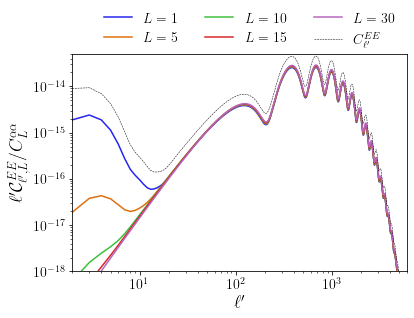

In [10]:
pl.plot_1dstyle(usetex=True,xlab=r'$\ell^\prime$',ylab=r'$\ell^\prime {\cal C}_{\ell^\prime,L}^{EE}/C_L^{\alpha\alpha}$',xmin=2,xmax=6000,ymin=1e-18,ymax=5e-14)
for L in [1,5,10,15,30]:
    loglog(le,le*calC[L,2:]/claa[L],label=r'$L='+str(L)+'$')
loglog(le,le*EE[2:lemax+1],ls='--',color='k',label=r'$C_{\ell^\prime}^{EE}$',lw=.5)
legend(ncol=3,bbox_to_anchor=(1., 1.25))
savefig('fig_calC_lowL.pdf',bbox_inches='tight',pad_inches=0)

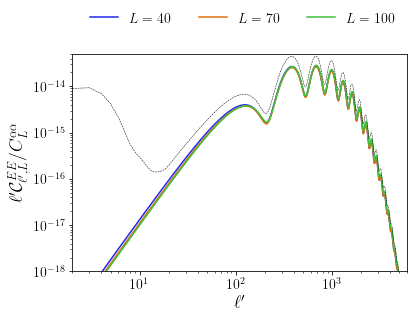

In [11]:
pl.plot_1dstyle(usetex=True,xlab=r'$\ell^\prime$',ylab=r'$\ell^\prime {\cal C}_{\ell^\prime,L}^{EE}/C_L^{\alpha\alpha}$',xmin=2,xmax=6000,ymin=1e-18,ymax=5e-14)
for L in [40,70,100]:
    loglog(le,le*calC[L,2:]/claa[L],label=r'$L='+str(L)+'$')
loglog(le,le*EE[2:lemax+1],ls='--',color='k',lw=.5)
legend(ncol=3,bbox_to_anchor=(1., 1.25))
savefig('fig_calC_highL.pdf',bbox_inches='tight',pad_inches=0)

In [11]:
clBB = local.compute_clbb(lbs,calC,Lmin=Lmin,Lmax=Lmax,lemin=lemin,lemax=lemax)

  0%|          | 0/210 [00:00<?, ?it/s]/global/u1/t/toshiyan/Work/Ongoing/rotation/biref-aniso-bb/local.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  le = np.array( [ np.arange(max([np.abs(L-lb),lemin]),min([L+lb,lemax])+1) for L in range(Lmax+1) ] )
100%|██████████| 210/210 [00:21<00:00,  9.74it/s]


In [12]:
calc = np.array( [ claa[L]*EE for L in Ls])
clbb = local.compute_clbb(lbs,calc,Lmin=Lmin,Lmax=Lmax,lemin=lemin,lemax=lemax)

100%|██████████| 210/210 [00:09<00:00, 22.90it/s]


In [13]:
ee = EE.copy()
ee[:10] = 0.
calc = np.array( [ claa[L]*ee for L in Ls])
clbb_rec = local.compute_clbb(lbs,calc,Lmin=Lmin,Lmax=Lmax,lemin=lemin,lemax=lemax)
ee = EE.copy()
ee[10:] = 0.
calc = np.array( [ claa_rei[L]*ee for L in Ls])
clbb_rei = local.compute_clbb(lbs,calc,Lmin=Lmin,Lmax=Lmax,lemin=lemin,lemax=lemax)

100%|██████████| 210/210 [00:08<00:00, 25.01it/s]


In [14]:
Acb = .3e-4

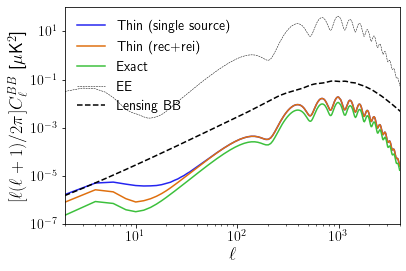

In [15]:
pl.plot_1dstyle(usetex=True,xlab=r'$\ell$',ylab=r'$[\ell(\ell+1)/2\pi]C^{BB}_{\ell}$ [$\mu$K$^2$]',xmin=2,xmax=4000,ymin=1e-7,ymax=1e2)
lbfac = cmb.Tcmb**2*lbs*(lbs+1)/(2.*np.pi)
lefac = cmb.Tcmb**2*le*(le+1)/(2.*np.pi)
loglog(lbs,lbfac*clbb*Acb,label='Thin (single source)')
#loglog(lbs,lbfac*clbb_rec*Acb,label='Thin (rec)',color='g',ls='--')
#loglog(lbs,lbfac*clbb_rei*Acb,label='Thin (rei)',color='g',ls='--')
loglog(lbs,lbfac*(clbb_rei+clbb_rec)*Acb,label=r'Thin (rec$+$rei)')
loglog(lbs,lbfac*clBB*Acb,label='Exact')
loglog(le,lefac*EE[2:lemax+1],label='EE',color='k',ls='--',lw=.5)
loglog(le,lefac*BB[2:lemax+1],label='Lensing BB',color='k',ls='--')
legend()
savefig('fig_BB.pdf',bbox_inches='tight',pad_inches=0)

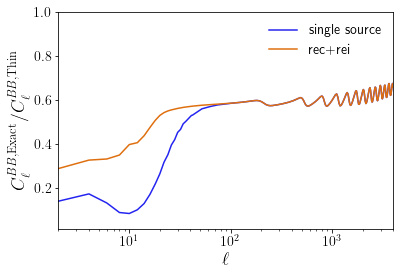

In [22]:
pl.plot_1dstyle(usetex=True,xlab=r'$\ell$',ylab=r'$C^{BB,{\rm Exact}}_{\ell}/C^{BB,{\rm Thin}}_{\ell}$',xmin=2,xmax=4000,ymin=.01,ymax=1,xlog=True)
plot(lbs,clBB/clbb,label='single source')
plot(lbs,clBB/(clbb_rei+clbb_rec),label=r'rec$+$rei')
axhline(0,color='k',ls='--',lw=.5)
legend()
savefig('fig_BB_ratio.pdf',bbox_inches='tight',pad_inches=0)